This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [2]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import  fashion_mnist

In [3]:
# get the data
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
test_img.shape

(10000, 28, 28)

In [6]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

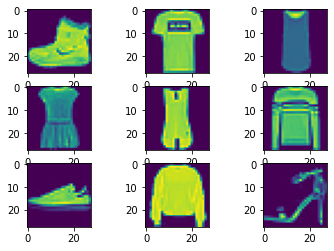

In [13]:
# visualize a sample
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_img[i])
plt.show()  

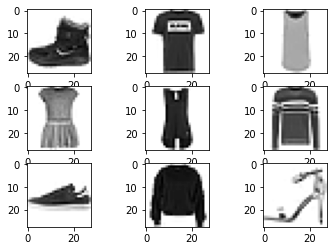

In [14]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
plt.show() 

In [15]:
# scale the pixels
train_img = train_img / 255
test_img = test_img / 255

In [63]:
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
# build the model
from tensorflow import keras
from keras import layers
from keras.layers import Dense

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout((0.5)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [64]:
# summarize the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 1, 1, 32)       

In [65]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='loss', patience=2)
history = model.fit(train_img, train_label, epochs=3)

Epoch 1/3
1342/1875 [====================>.........] - ETA: 14s - loss: 2.4523 - accuracy: 0.1269